# Housing Rental Analysis for San Francisco

In this projet, we use data visualization tools, including aggregation, interactive visualizations, and geospatial analysis, to find properties in the San Francisco market that are viable investment opportunities.

Description:

We use the `san_francisco_housing.ipynb` notebook to visualize and analyze the real-estate data.

We create a visualization by using the integration between Plotly and the Mapbox API. Be sure to create your environment file (`.env`) and include your Mapbox API access token. Then import your Mapbox API access token into the `san_francisco_housing.ipynb` notebook, and set it by using the `px.set_mapbox_access_token` function.

The project uses the `sfo_neighborhoods_census_data.csv` file from the `Resources` folder into the notebook and create the DataFrame that we’ll use in the analysis.

The main task in this project is to visualize and analyze the real-estate data in a Jupyter notebook. We use the `san_francisco_housing.ipynb` notebook to complete the following tasks:

* Calculate and plot the housing units per year.

* Calculate and plot the average prices per square foot.

* Compare the average prices by neighborhood.

* Build an interactive neighborhood map.

* Compose your data story.

##### Calculate and Plot the Housing Units per Year

For this part, we use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, we complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?

##### Calculate and Plot the Average Sale Prices per Square Foot

For this part, we use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, we complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

##### Compare the Average Sale Prices by Neighborhood

For this part, we use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, we complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

##### Build an Interactive Neighborhood Map

For this part, we explore the geospatial relationships in the data by using interactive visualizations with Plotly and the Mapbox API. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

5. Style and format the line plot to ensure a professionally styled visualization.

6. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with the Mapbox API.](Images/mapbox-plot.png)

7. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

##### Compose Your Data Story

Based on the visualizations that you created, answer the following questions:

* How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

* What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

In [61]:
# Import the required libraries and dependencies
import os
import pandas as pd
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import dash

## Enable your Mapbox API access token

In [23]:
# Load the .env file into the notebook
load_dotenv()

# Read in your MAPBOX_API_KEY
map_box_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm the availability of your Mapbox API access token by checking its type
type(map_box_api_access_token)

Python-dotenv could not parse statement starting at line 1


str

In [24]:
# Set your Mapbox API access token
px.set_mapbox_access_token(map_box_api_access_token)

## Import the data 

In [25]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(Path("Resources/sfo_neighborhoods_census_data.csv"), index_col="year")

# Review the first and last five rows of the DataFrame
display(sfo_data_df.head())
display(sfo_data_df.tail())


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390
2016,Visitacion Valley,328.319007,384242,4390
2016,Westwood Park,631.195426,384242,4390


---

## Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?



### Step 1: Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

In [26]:
# Create a numerical aggregation that groups the data by the year and then averages the results.
housing_units_by_year = sfo_data_df.groupby("year").mean()

growth_6y=housing_units_by_year["housing_units"].pct_change(6).dropna()
average_growth_1y=housing_units_by_year["housing_units"].pct_change().dropna().mean()

# Review the DataFrame
display(housing_units_by_year)
print(f"During the period 2010-2016:")
print(f"Growth of housing units         : {100*growth_6y.iloc[0]:.2f}%" )
print(f"Average Annual growth of housing: {100*average_growth_1y:.2f}%" )


,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


During the period 2010-2016:
Growth of housing units         : 3.14%
Average Annual growth of housing: 0.52%


### Step 2: Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

### Step 3: Style and format the line plot to ensure a professionally styled visualization.

In [60]:
# Create a visual aggregation explore the housing units by year
thousands_of_housing_units_by_year=housing_units_by_year["housing_units"]/1000

thousands_of_housing_units_by_year.hvplot.bar(
    rot=90
    ,title="Housing Units in San Francisco By Year (in Thousands) -- Period 2010-2016"
    ,xlabel= 'Year'
    ,ylabel='Housing Units (Thousands)'
    ,ylim=[300,400]
).opts(
    color='pink'
)


:Bars   [year]   (housing_units)

### Step 5: Answer the following question:

**Question** What is the overall trend in housing_units over the period being analyzed?

**Answer** # The overall trend is flat, as can be seen in the plot. Development of new housing appear to be very limited. In 6 years, the increment of housing units in San Francisco is the only 3.14%. Annualy, the average increment of housing units is of only 0.52%. Clearly almost not new housing is available every year in the city. 

---

## Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?



### Step 1: Group the data by year, and then average the results.

In [33]:
# Create a numerical aggregation by grouping the data by year and averaging the results
prices_square_foot_by_year = sfo_data_df.groupby("year").mean()

# Review the resulting DataFrame
prices_square_foot_by_year

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


In [34]:
#OBS: there is no standard deviation among years for the gross_rent. 
# That means, the value presented in the data corresponds to an average.
sfo_data_df[["gross_rent"]].groupby("year").describe()

gross_rent                                                     
          count    mean  std     min     25%     50%     75%     max
year                                                                
2010       59.0  1239.0  0.0  1239.0  1239.0  1239.0  1239.0  1239.0
2011       59.0  1530.0  0.0  1530.0  1530.0  1530.0  1530.0  1530.0
2012       58.0  2324.0  0.0  2324.0  2324.0  2324.0  2324.0  2324.0
2013       57.0  2971.0  0.0  2971.0  2971.0  2971.0  2971.0  2971.0
2014       60.0  3528.0  0.0  3528.0  3528.0  3528.0  3528.0  3528.0
2015       58.0  3739.0  0.0  3739.0  3739.0  3739.0  3739.0  3739.0
2016       46.0  4390.0  0.0  4390.0  4390.0  4390.0  4390.0  4390.0

**Question** What is the lowest gross rent reported for the years included in the DataFrame?

**Answer** # The lowest monthly gross rent value is $1,239, and occur in the year 2010.

### Step 2: Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

In [35]:
# Filter out the housing_units column, creating a new DataFrame 
# Keep only sale_price_sqr_foot and gross_rent averages per year
prices_square_foot_by_year = sfo_data_df.groupby("year").mean()[["sale_price_sqr_foot","gross_rent"]]

# Review the DataFrame
prices_square_foot_by_year


,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [134]:
# Changes in sale_price_sqr_foot & gross_rent
sale_price_and_rent_annual_changes=prices_square_foot_by_year.pct_change().dropna()
sale_price_and_rent_annual_changes=sale_price_and_rent_annual_changes.add_prefix("Annual_change_").add_suffix("(%)")
round(sale_price_and_rent_annual_changes*100,1)

,Annual_change_sale_price_sqr_foot(%),Annual_change_gross_rent(%)
year,,
2011,-7.4,23.5
2012,16.8,51.9
2013,21.1,27.8
2014,15.0,18.7
2015,13.7,6.0
2016,10.3,17.4


In [149]:
# Trend in income growth and sale price per sqr foot growth
(sale_price_and_rent_annual_changes*100).hvplot(
    kind="barh"
    ,title= "Change in Sale Price Per Sqr Foot Growth and Rent Growth in San Francisco 2011-2016"
    ,ylabel= "Sale Price per Square Feet Change \n and Gross Rent Change \n per Year (%)"
    ,xlabel="Year"
    ,legend='top_right'
    ,stacked=False
    ,rot=45
    ,width=1000
    ,height=600

)


:Bars   [year,Variable]   (value)

We can see than since 2012, consistently, the real estate market have had an appreciation in the price of properties as well as on the rent. If this trends remains, it would imply that it is a good business to buy a house, and rent it. You would expect future gains for the rent itself, as well as for the appreciation of the house when you decide to sell
the property.

### Step 3: Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

> **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`

### Step 4: Style and format the line plot to ensure a professionally styled visualization.


In [32]:
# Plot prices_square_foot_by_year. 
# Inclued labels for the x- and y-axes, and a title.
prices_square_foot_by_year.hvplot(
    xlabel="Year"
    ,ylabel="Sale Price per Sqr Foot \n & Gross Rent \n [US Dollars]"
    ,title="Sale Price per Square Foot & Average Gross Rent, in San Francisco -- 2010-2016"
    ,legend=True
    ,width=800
    
)

:NdOverlay   [Variable]
   :Curve   [year]   (value)

### Step 6: Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

**Question** * Did any year experience a drop in the average sale price per square foot compared to the previous year?

**Answer** # Yes. In the year 2011 the sale price per square footage was 342 [USD], dropping a 7.4% from the 2010 value of 369 [USD].

**Question** * If so, did the gross rent increase or decrease during that year?I

**Answer** # The gross rent actually increased by a significant 23.5% from USD 1,239 to USD 1,530 during that same year 2011.

---

## Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 


### Step 1: Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

In [11]:
# Group by year and neighborhood and then create a new dataframe of the mean values
prices_by_year_by_neighborhood = sfo_data_df.groupby(["year","neighborhood"]).mean()

# Review the DataFrame
prices_by_year_by_neighborhood.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

### Step 2: Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

In [12]:
# Filter out the housing_units
prices_by_year_by_neighborhood = prices_by_year_by_neighborhood.drop(columns=["housing_units"])

# Review the first and last five rows of the DataFrame
display(prices_by_year_by_neighborhood.head() )
display(prices_by_year_by_neighborhood.tail() )


sale_price_sqr_foot  gross_rent
year neighborhood                                     
2010 Alamo Square               291.182945        1239
     Anza Vista                 267.932583        1239
     Bayview                    170.098665        1239
     Buena Vista Park           347.394919        1239
     Central Richmond           319.027623        1239

sale_price_sqr_foot  gross_rent
year neighborhood                                           
2016 Telegraph Hill                   903.049771        4390
     Twin Peaks                       970.085470        4390
     Van Ness/ Civic Center           552.602567        4390
     Visitacion Valley                328.319007        4390
     Westwood Park                    631.195426        4390

### Step 3: Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

### Step 4: Style and format the line plot to ensure a professionally styled visualization.

In [66]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighborhood
prices_by_year_by_neighborhood.hvplot(
    groupby="neighborhood"
    ,title="Average Price per Square Foot, and Gross Rent in San Francisco's Neighborhoods"
    ,xlabel="Year"
    ,ylabel="US Dollars"
)

:DynamicMap   [neighborhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

### Step 6: Use the interactive visualization to answer the following question:

**Question** For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

**Answer** In 2016 the price for the Anza Vista neighborhood is lower. Indeed, using the plot above, by selecting Anza Vista in the neighborhood drop down, and then looking at the hover on the respective years, we can see that for the Anza Vista neighborhood, the sale price per square foot in 2012 was 344.49. The averages sale price per square foot in 2016 was 88.40. The average sale price per square foot is significantly lower in 2016 than it was in 2012. This constrast with the price of rent that rise in all the city.

---

## Build an Interactive Neighborhood Map

For this part, we explore the geospatial relationships in the data by using interactive visualizations with Plotly and the Mapbox API. To build the map, we use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, we complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

5. Style and format the line plot to ensure a professionally styled visualization.

6. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with the Mapbox API.](Images/mapbox-plot.png)

7. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?



### Step 1: Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

In [67]:
# Load neighborhoods coordinates data
neighborhood_locations_df = pd.read_csv(Path("Resources/neighborhoods_coordinates.csv"), index_col="Neighborhood")

# Review the DataFrame
neighborhood_locations_df


,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
...,...,...
West Portal,37.740260,-122.463880
Western Addition,37.792980,-122.435790
Westwood Highlands,37.734700,-122.456854


### Step 2: Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

In [68]:
# Calculate the mean values for each neighborhood
all_neighborhood_info_df = sfo_data_df.groupby("neighborhood").mean()

# Review the resulting DataFrame
all_neighborhood_info_df 


,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.00,2817.285714
Anza Vista,373.382198,379050.00,3031.833333
Bayview,204.588623,376454.00,2318.400000
Bayview Heights,590.792839,382295.00,3739.000000
Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...
West Portal,498.488485,376940.75,2515.500000
Western Addition,307.562201,377427.50,2555.166667
Westwood Highlands,533.703935,376454.00,2250.500000


### Step 3: Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. 

Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. 

The second cell cleans the data and sets the “Neighborhood” column. 

Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

In [73]:
# Using the Pandas `concat` function, join the 
# neighborhood_locations_df and the all_neighborhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The concat function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighborhoods_df = pd.concat(
    [neighborhood_locations_df, all_neighborhood_info_df], 
    axis="columns",
    sort=False
)

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())


,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
Bernal Heights,37.728630,-122.443050,NaN,NaN,NaN


,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
Yerba Buena,37.79298,-122.39636,576.709848,377427.5,2555.166667
Bernal Heights,NaN,NaN,576.746488,379374.5,3080.333333
Downtown,NaN,NaN,391.434378,378401.0,2817.285714
Ingleside,NaN,NaN,367.895144,377427.5,2509.000000
Outer Richmond,NaN,NaN,473.900773,378401.0,2817.285714


In [74]:
# Call the dropna function to remove any neighborhoods that do not have data
#all_neighborhoods_df = all_neighborhoods_df.dropna()
all_neighborhoods_df = all_neighborhoods_df.reset_index().dropna()


# Rename the "index" column as "Neighborhood" for use in the Visualization
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())



,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
5,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
68,West Portal,37.74026,-122.463880,498.488485,376940.75,2515.500000
69,Western Addition,37.79298,-122.435790,307.562201,377427.50,2555.166667
70,Westwood Highlands,37.73470,-122.456854,533.703935,376454.00,2250.500000
71,Westwood Park,37.73415,-122.457000,687.087575,382295.00,3959.000000
72,Yerba Buena,37.79298,-122.396360,576.709848,377427.50,2555.166667


In [75]:
all_neighborhoods_df.sort_values("gross_rent")

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
19,Forest Knolls,37.75706,-122.455090,321.840837,374507.00,1781.50
12,Diamond Heights,37.72863,-122.443050,434.991739,375480.50,2016.00
60,South Beach,37.78323,-122.400650,650.124479,375805.00,2099.00
38,Miraloma Park,37.73415,-122.457000,779.810842,375967.25,2155.25
70,Westwood Highlands,37.73470,-122.456854,533.703935,376454.00,2250.50
...,...,...,...,...,...,...
36,Merced Heights,37.71993,-122.465950,788.844818,380348.00,3414.00
59,Silver Terrace,37.73467,-122.401060,170.292549,380348.00,3528.00
67,Visitacion Valley,37.72874,-122.410980,301.466180,381321.50,3657.00
3,Bayview Heights,37.72874,-122.410980,590.792839,382295.00,3739.00


### Step 4: Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.
    * Set the `color` parameter to “gross_rent”.
    * Set the `size_max` parameter to “25”.
    * Set the `zoom` parameter to “11”.

### Step 5: Style and format the line plot to ensure a professionally styled visualization.


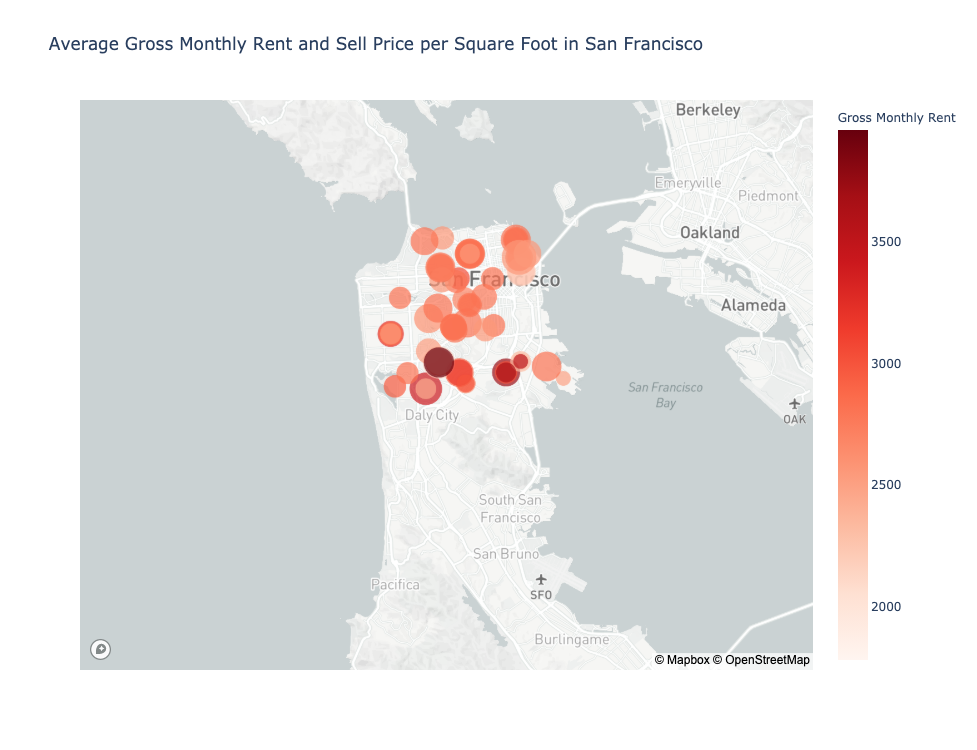

In [76]:
px.scatter_mapbox(
    all_neighborhoods_df
    ,title= "Average Gross Monthly Rent and Sell Price per Square Foot in San Francisco"
    ,size="sale_price_sqr_foot"
    ,color="gross_rent"
    ,lat="Lat"
    ,lon="Lon"
    ,size_max=25
    ,zoom=11
    ,color_continuous_scale="reds"
    ,hover_name="Neighborhood"
    ,hover_data={'Lat':False, 'Lon':False, "sale_price_sqr_foot":":.0f","gross_rent":":,.0f" }
    ,height=750
    ,width=750
    ,labels={"sale_price_sqr_foot":"Sale Price per Square Foot","gross_rent":"Gross Monthly Rent"}
)


### Step 7: Use the interactive map to answer the following question:

**Question** Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

**Answer** # The highest sale price per square foot can be found by looking for the larger circle in the Map. This corresponds to Union Square District, which is at USD 904. About the rent, with the data we have we cannot really respond the question for which has the higher rent. Thus, the rent in the data source for a particular year is the same for all neirborhoods. In the plot, however, some neirborhoods appear with a different rent amount, because the average is made across the years available, and some of them are missing some years. The map shows average across time for each neirborhood, so we get that highest gross rent for Westwood Park with a $3,959 monthly, as can be found by the darker red on the map, because it only has data points for 2016 and 2014, so the average appears as higher.

# Preparing some additional calculations to create the story.

In [224]:
#Preparing data for calculating changes in prices per sqr foot across neighborhoods
prices_by_year_by_neighborhood.sale_price_sqr_foot.unstack()

neighborhood,Alamo Square,Anza Vista,Bayview,Bayview Heights,Bernal Heights,Buena Vista Park,Central Richmond,Central Sunset,Clarendon Heights,Corona Heights,...,Telegraph Hill,Twin Peaks,Union Square District,Van Ness/ Civic Center,Visitacion Valley,West Portal,Western Addition,Westwood Highlands,Westwood Park,Yerba Buena
year,,,,,,,,,,,,,,,,,,,,,
2010,291.182945,267.932583,170.098665,NaN,NaN,347.394919,319.027623,418.172493,NaN,369.359338,...,524.793509,331.555996,569.193448,108.012927,NaN,392.300764,215.569134,NaN,NaN,333.126774
2011,272.527310,NaN,172.540562,NaN,471.921732,171.772347,261.663800,391.426450,520.718168,222.567848,...,483.405773,284.566966,302.123253,384.236802,NaN,NaN,227.418981,320.074333,NaN,438.860545
2012,183.099317,344.490914,165.798062,NaN,368.266561,338.601164,279.030140,334.487873,NaN,356.794814,...,465.802122,304.899648,445.196788,345.958040,NaN,325.795415,274.338460,NaN,NaN,491.814003
2013,387.794144,453.340498,259.547163,NaN,630.897303,455.218089,343.054261,330.736431,453.771605,NaN,...,653.311617,414.435693,1290.472107,285.009506,293.298372,588.074797,217.089069,747.333538,NaN,753.011413
2014,484.443552,620.441407,254.958662,NaN,544.546929,NaN,423.952727,456.241996,NaN,888.182144,...,708.193032,562.911234,558.271119,475.393187,282.025468,687.782963,429.488317,NaN,742.979723,479.923749
2015,602.115877,465.686275,NaN,590.792839,458.004299,551.695622,473.163815,453.379377,NaN,1100.791194,...,996.990220,417.335379,2258.702832,677.838232,302.221873,NaN,481.469244,NaN,NaN,963.522606
2016,340.981835,88.401511,NaN,NaN,986.842105,851.401405,661.064426,581.370875,NaN,NaN,...,903.049771,970.085470,NaN,552.602567,328.319007,NaN,NaN,NaN,631.195426,NaN


In [172]:
# Calculation of the change in prices per square feet per year and neighborhood sorted by the ones that have
# more decrease in price in 2016
change_in_prices_by_year=prices_by_year_by_neighborhood.sale_price_sqr_foot.unstack().pct_change()
change_in_prices_by_year.T.sort_values(2016).head(15)

year,2010,2011,2012,2013,2014,2015,2016
neighborhood,,,,,,,
Outer Mission,NaN,NaN,0.560976,0.000000,0.000000,1.545000,-0.927796
Anza Vista,NaN,0.000000,0.285737,0.315972,0.368599,-0.249427,-0.810169
Hayes Valley,NaN,0.031018,0.091359,0.604519,-0.127475,0.250938,-0.673723
Park North,NaN,-0.111686,-0.005273,0.779483,-0.274479,0.657790,-0.657297
Marina,NaN,0.008843,0.139186,0.471644,-0.018864,0.762243,-0.618706
Alamo Square,NaN,-0.064068,-0.328143,1.117944,0.249229,0.242902,-0.433694
Inner Parkside,NaN,0.000000,0.000000,0.000000,1.990458,0.276836,-0.320532
Inner Sunset,NaN,0.097309,0.076748,0.336731,0.081066,0.357421,-0.302314
South of Market,NaN,-0.157943,0.372567,-0.092684,1.661074,-0.359656,-0.259309


In [225]:
appreciation_full_period=prices_by_year_by_neighborhood.sale_price_sqr_foot.unstack().pct_change(6)
print(appreciation_full_period.T.sort_values(2016).head(8))
print(appreciation_full_period.T.sort_values(2016)[appreciation_full_period.loc[2016,:]>0].tail(8))

year           2010  2011  2012  2013  2014  2015      2016
neighborhood                                               
Anza Vista      NaN   NaN   NaN   NaN   NaN   NaN -0.670061
South Beach     NaN   NaN   NaN   NaN   NaN   NaN -0.494138
Hayes Valley    NaN   NaN   NaN   NaN   NaN   NaN -0.357048
Park North      NaN   NaN   NaN   NaN   NaN   NaN -0.351870
Ingleside       NaN   NaN   NaN   NaN   NaN   NaN -0.301361
Oceanview       NaN   NaN   NaN   NaN   NaN   NaN -0.057386
Hunters Point   NaN   NaN   NaN   NaN   NaN   NaN  0.000000
Marina          NaN   NaN   NaN   NaN   NaN   NaN  0.115004
year                    2010  2011  2012  2013  2014  2015      2016
neighborhood                                                        
Twin Peaks               NaN   NaN   NaN   NaN   NaN   NaN  1.925857
Downtown                 NaN   NaN   NaN   NaN   NaN   NaN  1.972553
Corona Heights           NaN   NaN   NaN   NaN   NaN   NaN  1.980272
Mission Terrace          NaN   NaN   NaN   NaN   NaN   

/Users/Paola/Applications/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [228]:
# Yearly change in prices during the period
change_in_prices_by_year_sorted=change_in_prices_by_year.T.sort_values(2016)*100
change_in_prices_by_year_sorted.hvplot.barh(
    height=1000
    ,stacked=True
    ,ylabel="Sum of annual appreciation 2010-2016 (%)"
)

:Bars   [neighborhood,year]   (value)

## Compose Your Data Story

Based on the visualizations, here we compose a data story that synthesizes the analysis by answering the following questions:

**Question**  How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

**Answer** # The trend in rental income have been to increase in the period 2010-2016 significantly. The price per square foot as well. At the same time, the amount of units in the same period have almost not increase.. That is to say, we are in the presence of a rental market with increase demand, but stagnant supply. The appreciation in of the real estate is not for all neirborhoods. A few of them did not increase their value in the period, like Anza Vista, Sounth Beach, Hayes Valley, Park North, Ingleside, and Oceanview. However, most of them have an appreciation, many by more than double its price per square foot in the period, such as For example, Van Ness/ Civic Center, Union Square District, Outer Richmond, Croker Amazon, and Mission Terrace.

This is the perfect scenario for the one click buy-and-rent strategty. Buying a property would not only see returns for the appreciation of the property itself, but for the increase of rent due to increase of rental demand, since the rent may be expected to continue increasing for the lack of real estate development.

Since the general trend for real estate price appreciation is positive, it would be good to focus in buying from neighborhhods that may be selling at a discount. Those may be the ones that had a positive overall appreciation, but a negative change in price per square foot in the last year available, 2016. Those cases are Outer Mission, Anza Vista, Hayes Valley, Park North, Marina, and Alamo Square. Unfortunately, we do not have differentiated rent prices by neighborhood in each year in the census csv file, in order to add that element to the analysis. However, given the explosive increase in rent prices as a whole, we can assume that all rent prices follow an upward trend in the period. 

Giving the pandemic, data until 2016 does not appear enough to have an updated picture to give a final recommendation.  However, recent analysis, like in https://www.zumper.com/blog/state-of-the-san-francisco-bay-area-renter-2020/ shows that rent prices have dropped in San Francisco due to many people moving out, but many people have started moving in, specially coming from Sacramento, due to the fell in rent prices. This means that we can expect prices to stabilize at some point, and to reach a bottom. If we assume that the behavior of prices after the bottom are going to be similar to the behaviour in 2010-2016 as we get out of the pandemic, and if the trend of almost no new housing development remains after 2021, probably 2021 may be a very good opportunity to enter the real estate market, buy houses at discount, and enjoy rising rental prices in the near future.

In conclusion, we see potential for the buy-and-rent strategy for a double source of profit on the real estate appreciation, and the rental income. Among all the neirborhoods that we would recommend to invest giving the data available, Outer Mission presents a high overall appreciation, with a large drop in 2016. Assuming that trend is still valid in 2021, that would be the first choice, since may be the Neirborhood selling at the larger discount.